### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [36]:
sample_data.head(2)

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636


Below is an example of Simpson's Paradox

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [25]:
boot_sample = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    mean_coff = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    mean_nocoff = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    diff = mean_coff - mean_nocoff
    boot_sample.append(diff)

In [26]:
np.percentile(boot_sample, 1), np.percentile(boot_sample, 99)

(0.22145014250352249, 2.432024934561019)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [14]:
boot21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    mean21 = bootsamp[bootsamp['age'] == '>=21']['height'].mean()
    meanu21 = bootsamp[bootsamp['age'] == '<21']['height'].mean()
    diff = mean21 - meanu21
    boot21.append(diff)

In [15]:
np.percentile(boot21, 1), np.percentile(boot21, 99)

(3.4357212278738629, 5.013052059555517)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [18]:
bootu21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    meanu21cof = bootsamp[(bootsamp['drinks_coffee'] == True)&(bootsamp['age'] == '<21')]['height'].mean()
    meanu21ncof = bootsamp[(bootsamp['drinks_coffee'] == False)&(bootsamp['age'] == '<21')]['height'].mean()
    diff = meanu21cof - meanu21ncof
    bootu21.append(diff)

In [19]:
np.percentile(bootu21, 2.5), np.percentile(bootu21, 97.5)

(-2.5931557940679251, -1.0593651244624338)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [20]:
booto21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    meano21cof = bootsamp[(bootsamp['drinks_coffee'] == True)&(bootsamp['age'] == '>=21')]['height'].mean()
    meano21ncof = bootsamp[(bootsamp['drinks_coffee'] == False)&(bootsamp['age'] == '>=21')]['height'].mean()
    diff = meano21cof - meano21ncof
    booto21.append(diff)

In [27]:
np.percentile(booto21, 2.5), np.percentile(booto21, 97.5)

(-4.4026329654774772, -1.8278953970884224)

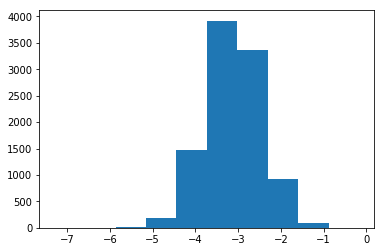

In [35]:
plt.hist(booto21);

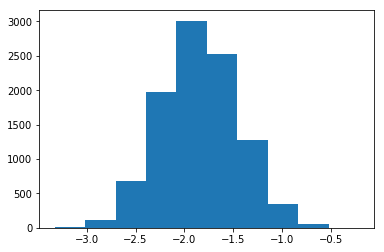

In [31]:
plt.hist(bootu21);